In [15]:

#@title The MIT License (MIT)
#
# Copyright (c) 2024 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.


# Introduction

This notebook explores a **Simple Linear Regression** project applied to price prediction based on the quantity of products sold. The goal is to build a predictive model, evaluate its effectiveness and explore the relationship between the variables analyzed.

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ericshantos/playground/blob/main/projects/product_value_forecast/product_value_forecast.ipynb
"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ericshantos/playground/blob/main/projects/product_value_forecast/product_value_forecast.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View the code on GitHub</a>
  </td>
</table>

## Project Steps

1. **Data Loading**

The data used is fictitious, simulated to represent the relationship between quantity sold and sales price (R$). They are loaded from a CSV file:

**Main Columns**:

- Quantity Sold: Number of units sold.
- Sales Price (R$): Total value in reais.

2. **Initial Data Visualization**

Before performing any analysis, I consider it essential to understand how the variables are related. Therefore, I generated a scatter plot to visually explore the pattern between the independent (X) and dependent (Y) variables.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Read from the data used by the model
df = pd.read_csv('product_data.csv')

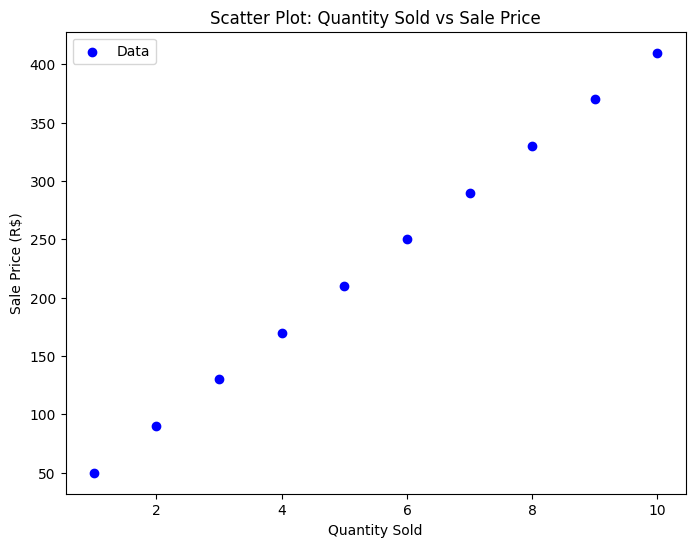

In [18]:
# Create the scatter plot
plt.figure(figsize=(8, 6)) # Size of the figure
plt.scatter(df['Quantidade Vendida'], df['Preço de Venda (R$)'], color='blue', label='Data')

# Add title and labels to the axes
plt.title('Scatter Plot: Quantity Sold vs Sale Price')
plt.xlabel('Quantity Sold')
plt.ylabel('Sale Price (R$)')

# Add the legend
plt.legend()

# Display the chart
plt.show()

3. **Importing the Necessary Libraries**

To begin the analysis and modeling process, I imported the essential libraries. The `LinearRegression` class, from the `sklearn.linear_model` library, was used to build the linear regression model. In addition, the `train_test_split` function, from the `sklearn.model_selection` library, was imported to split the data into training and testing sets, ensuring an efficient and reproducible separation of the data.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

3. **Preprocessing**

The independent variable was separated as X and the dependent variable as Y. To ensure compatibility with the regression model, X was transformed into a two-dimensional matrix:

In [20]:
# independent variable
X = df.drop('Preço de Venda (R$)', axis=1)

# dependent variable
y = df['Preço de Venda (R$)']

4. **Dataset Split**

To ensure robust analysis, I split the dataset into training and testing sets. Using the train_test_split function, I reserved 20% of the data for the testing set, while 80% was allocated to the training set. This split was performed with a fixed random state (random_state=42) to ensure reproducibility of the results.

In [21]:
# separating the dataset into data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Model Training**

The Simple Linear Regression model was adjusted using the scikit-learn library. The adjustment is made by mapping the linear relationship between Quantity Sold and Sales Price.

- **Model used:** LinearRegression().

- **Adjusted parameters:**

- coef_: Represents the angular coefficient of the line.

- intercept_: Represents the point where the line crosses the Y axis.

In [22]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

5. **Model Evaluation**

The model performance was evaluated using the coefficient of determination $R^2$, which measures the proportion of variance explained by the independent variable.

- Adjusted equation:

In [23]:
# Displays the equation of the line fitted by the linear regression model
# Displays the slope (model.coef_[0]) and intercept (model.intercept_) formatted to two decimal places
print(f'The equation of the line is: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

The equation of the line is: y = 40.00x + 10.00


- Value of $R^2$:

In [24]:
# Calculate the coefficient of determination (R²) of the model with the test data
r2 = model.score(X_test, y_test)

# Display the R² value formatted with two decimal places
print(f'R²: {r2:.2f}')

R²: 1.00


6. **Predicting Values ​​with the Trained Model**

After evaluating the linear regression model, I used the predict function to make a prediction based on a new value. In this case, I provided the value 11 as input, and the model returned the corresponding estimate for the dependent variable.

In [25]:
# Perform the prediction for a new value (11) using the trained model
print(model.predict([[11]]))

[450.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
